In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [22]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Ethans/Datasets/framingham.csv')

In [23]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


**Dataset Description**

The Framingham Heart Study is a long-term, ongoing cardiovascular study conducted in Framingham, Massachusetts, USA, which began in 1948. The dataset is often used for research and analysis in the field of cardiovascular health.

Here is a breakdown of the columns in the dataset:

male: A binary variable indicating the gender of the individual (1 for male, 0 for female).

age: The age of the individual in years.

education: A categorical variable representing the level of education of the individual.

currentSmoker: A binary variable indicating whether the individual is a current smoker (1 for current smoker, 0 for non-smoker).

cigsPerDay: The average number of cigarettes smoked per day by the individual.

BPMeds: A binary variable indicating whether the individual is taking blood pressure medication (1 for taking medication, 0 for not taking medication).

prevalentStroke: A binary variable indicating whether the individual has a history of stroke (1 for history of stroke, 0 for no history of stroke).

prevalentHyp: A binary variable indicating whether the individual has hypertension (1 for hypertension, 0 for no hypertension).

diabetes: A binary variable indicating whether the individual has diabetes (1 for diabetes, 0 for no diabetes).

totChol: The total cholesterol level of the individual in mg/dL.

sysBP: The systolic blood pressure of the individual in mmHg.

diaBP: The diastolic blood pressure of the individual in mmHg.

BMI: The Body Mass Index of the individual, calculated as weight in kilograms divided by height in meters squared.

heartRate: The resting heart rate of the individual in beats per minute.

glucose: The glucose level of the individual in mg/dL.

TenYearCHD: A binary variable indicating whether the individual is at risk of developing coronary heart disease within ten years (1 for at risk, 0 for not at risk).

**TenYearCHD is the target variable**

Each row in the dataset represents an individual participant in the study, with their corresponding values for each column.

In [24]:
df.shape # No of rows, No of columns

(4238, 16)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [26]:
# No of null values in the dataset
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [27]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [28]:
# Drop the null values
df = df.dropna()

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3656 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3656 non-null   int64  
 1   age              3656 non-null   int64  
 2   education        3656 non-null   float64
 3   currentSmoker    3656 non-null   int64  
 4   cigsPerDay       3656 non-null   float64
 5   BPMeds           3656 non-null   float64
 6   prevalentStroke  3656 non-null   int64  
 7   prevalentHyp     3656 non-null   int64  
 8   diabetes         3656 non-null   int64  
 9   totChol          3656 non-null   float64
 10  sysBP            3656 non-null   float64
 11  diaBP            3656 non-null   float64
 12  BMI              3656 non-null   float64
 13  heartRate        3656 non-null   float64
 14  glucose          3656 non-null   float64
 15  TenYearCHD       3656 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 485.6 KB


In [30]:
df.isnull().sum() # Now there are no null values

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [41]:
# Split X and y
X = df.drop('TenYearCHD',axis = 1)
y = df['TenYearCHD']

In [42]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [43]:
# Scale the features using Standard Scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
# Build the logistic regression model
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [45]:
# Make predictions
y_pred = model.predict(X_test)

In [46]:
# Accuracy Score
acc = accuracy_score(y_test,y_pred)
print("Accuracy Score: ",acc)

Accuracy Score:  0.860655737704918


In [52]:
# Perform 10-fold Cross Validation and get the mean accuracy
scores = cross_val_score(model,X_train,y_train,cv = 10)
mean_accuracy = scores.mean()
print("Mean Accuracy: ",mean_accuracy)

Mean Accuracy:  0.852887537993921


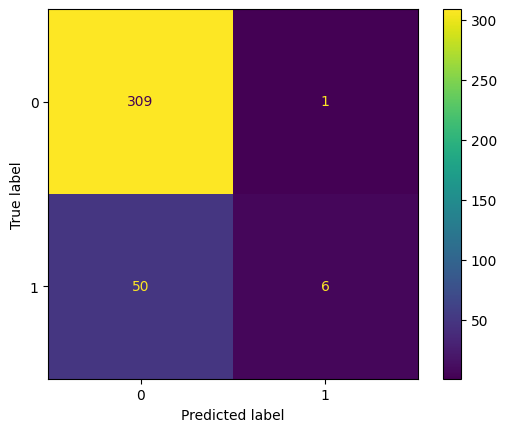

In [51]:
# Plot Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()